In [2]:
from roboflow import Roboflow
import supervision as sv
import cv2

In [3]:
rf = Roboflow(api_key="hwPc1mCyLcycZtoY4wTq")
project = rf.workspace().project("detectsmoker")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [25]:
result = model.predict("/content/Polad.jpg", confidence=40, overlap=30).json()

In [26]:
labels = [item["class"] for item in result["predictions"]]

In [27]:
detections = sv.Detections.from_roboflow(result)
label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

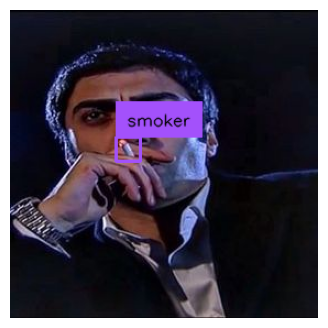

In [29]:
image = cv2.imread("/content/Polad.jpg")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)
sv.plot_image(image=annotated_image, size=(4, 4))